<a href="https://colab.research.google.com/github/06081992/Machine-Learning-first-steps/blob/main/Modelo_de__ML_Jorge_Jaramillo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##ACTIVIDAD / CASO PRÁCTICO
En este trabajo se utilizará el conjunto de datos (de acceso público) de enfermedades cardíacas "Framingham", que incluye más de cuatro mil registros, en 16 columnas y 15 atributos, siendo la variable objetivo el riesgo a 10 años de sufrir una enfermedad cardiovascular (CHD por sus siglas en inglés). Por tanto, se trata de construir un predictor que permita clasificar a los pacientes según el riesgo de enfermedad.

A partir de aquí, se trata de completar el siguiente listado de tareas implementando el código funcional en cuadrículas separadas, identificadas por un título con el número de ejercicio y añadiendo los comentarios al código que estimes oportuno.

1. Realiza una exploración del conjunto de datos utilizando métodos de la librería Pandas para cargar, filtrar y listar tablas de datos.
2. Prepara una o más funciones que permitan realizar una exploración visual de los datos más relevantes utilizando las librerías python de tu elección.
3. Si lo estimas necesario, ejecuta métodos de imputación y normalización de datos explicando explicando brevemente tus decisiones.
4. Realiza un análisis básico de selección de características siguiendo alguna de las técnicas vistas a lo largo del módulo que te permita obtener una submuestra depurada del dataset original.
5. Partiendo de esta submuestra final, genera los grupos de entrenamiento y validación e imprime pos pantalla alguna características del mismo.
6. Instancia el modelo Scikit-learn de tu elección y aplícalo sobre los datos seleccionados para el entrenamiento.
7. Calcula y muestra por pantalla información (métricas) sobre el desempeño del modelo frente al conjunto de validación.
8. Una vez completado, comporte tu cuaderno de Google Colab con cualquier persona que tenga el enlace (apúntalo en la hoja de ejercicios)


###Preparación del Entorno

#### 1. Realiza una exploración del conjunto de datos utilizando métodos de la librería Pandas para cargar, filtrar y listar tablas de datos.

###Exploración de Datos

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns


In [ ]:
# Cargar los datos en un DataFrame
data = pd.read_csv("heart_disease.csv")
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
# Revisamos la forma del dataset
print('No. de registros:', data.shape[0], '\nNo. de caracteristicas:', data.shape[1])

No. de registros: 4238 
No. de caracteristicas: 16


In [ ]:
# Mostramos la información del dataset
data.info(5)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


Podemos visualizar los resultados que tenemos:
- (7) x int64 datatype attributes
- (9) x float64 datatype attributes

###Limpieza de Datos

In [ ]:
# Comprobamos si hay valores nulos
print(f'Valores NaN\n: {data.isnull().sum()}')

Valores NaN
: male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64


In [ ]:
# Porcentaje de alores nulos
data.isnull().sum() / data.shape[0] *100

male               0.000000
age                0.000000
education          2.477584
currentSmoker      0.000000
cigsPerDay         0.684285
BPMeds             1.250590
prevalentStroke    0.000000
prevalentHyp       0.000000
diabetes           0.000000
totChol            1.179802
sysBP              0.000000
diaBP              0.000000
BMI                0.448325
heartRate          0.023596
glucose            9.155262
TenYearCHD         0.000000
dtype: float64

. Podemos examinar que tenemos valores NaNs en las siguientes características.
- education (105) = 2.47%
- cigsPerDay (29) = 0.68%
- BPMeds (53) = 1.25%
- totChol(50) = 1.17%
- BMI (19) = 0.44%
- hearRate (1) = 0.02%
- glucose(388) = 9.15%

###Visualización de Datos

#### 2. Prepara una o más funciones que permitan realizar una exploración visual de los datos más relevantes utilizando las librerías python de tu elección.

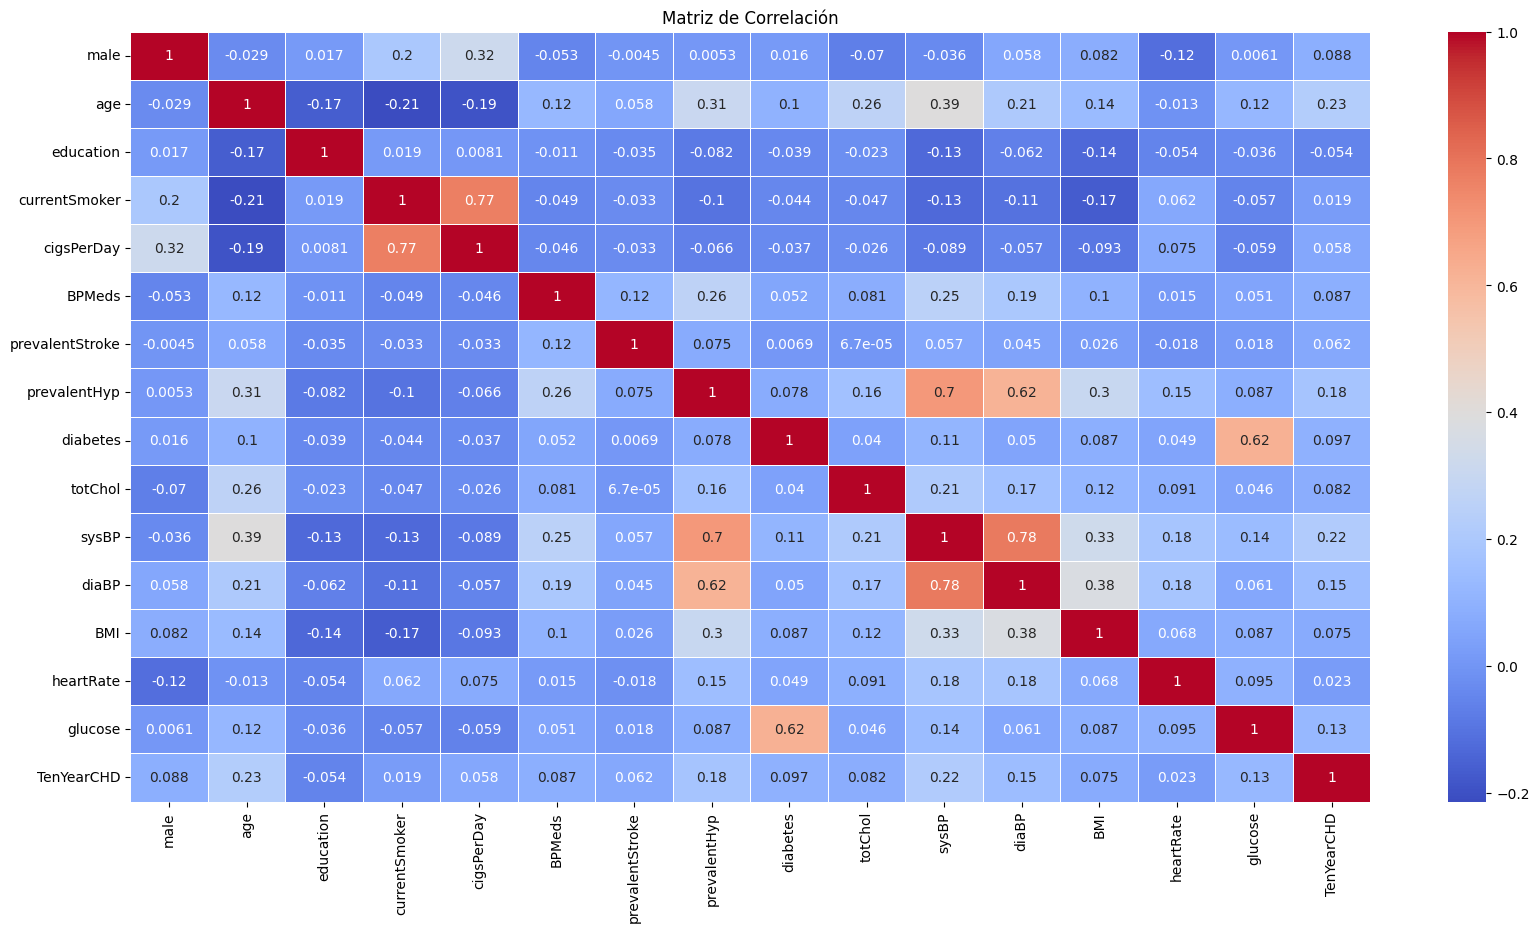

In [ ]:
#Utilizamos la correlación entre variables númericas (Matriz de Correlación)
matriz_correlacion = data.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(matriz_correlacion, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Matriz de Correlación")
plt.show()



###Obeservaciones:
El diagrama de correlación nos proporciona información valiosa sobre la relación entre los atributos. Puede ser negativa, positiva o nula. Necesitamos siempre mantener 1 característica de las 2 fuertemente correlacionadas pero como queremos realizar "El Analisis Exploratorio de Datos" las mantendremos todas y las descartaremos antes de modelar.

currentSmoker & cigsPerDay tiene una Correlación fuerte de 77 (Escalado para mejores Observaciones)
prevalentHyp vs sysBP / diaBP tienen una correlación positiva de 70 y 62.
Mientras que la glucosa y la diabetes están correlacionadas positivamente.
sysBP & diaBP también tienen Correlación Positiva.
Usualmente llenamos los Valores Nulos con Medidas de Tendencia Central (Media / Mediana / Modo) tenemos técnicas como Forward / Backward fill pero en este caso podemos observar el gráfico de Correlación y considerarlo para Llenar los valores faltantes. Por ejemplo, tenemos una correlación positiva entre currentSmoker y cigsPerDay, sabemos que currentSmoker tiene valores 1 (es fumador) o 0 (no es fumador), podemos agrupar por currentSmoker e imputar los valores que faltan basándonos en la mediana. Podemos hacer lo mismo con el IMC basándonos en el sexo y la edad.

### Histogramas para características numéricas

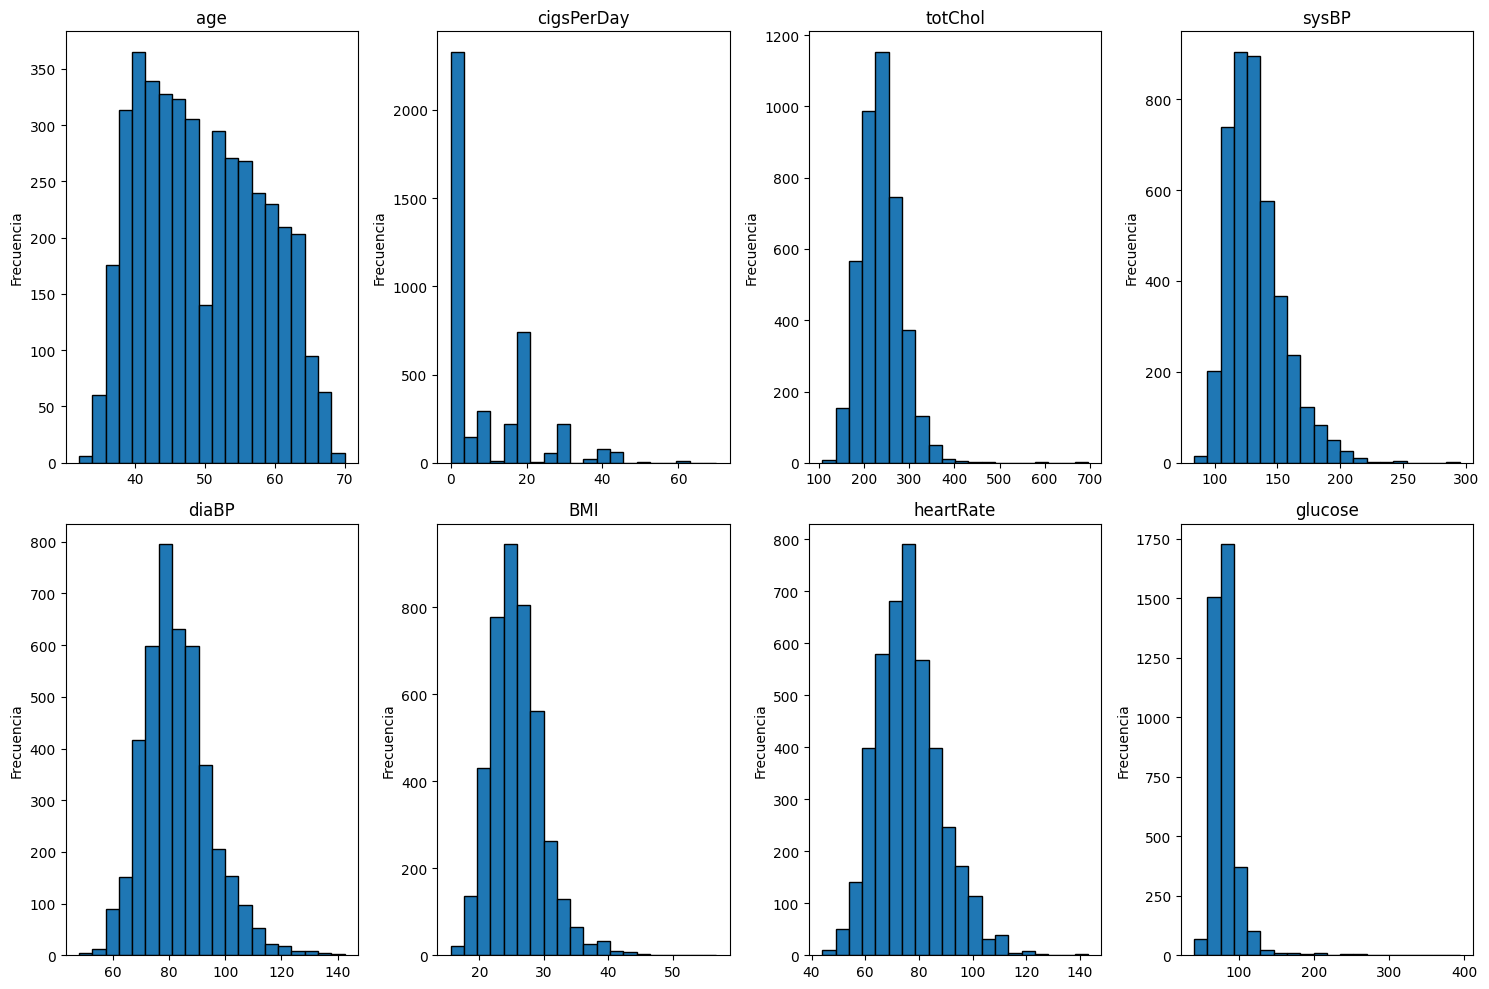

In [ ]:
# Seleccionar las características numéricas
numeric_features = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

# Crear subplots para los histogramas
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 10))
for i, feature in enumerate(numeric_features):
    ax = axes[i//4, i%4]
    data[feature].plot(kind='hist', ax=ax, bins=20, edgecolor='k', title=feature)
    ax.set_ylabel('Frecuencia')
plt.tight_layout()
plt.show()

### Gráfico de dispersión entre dos características

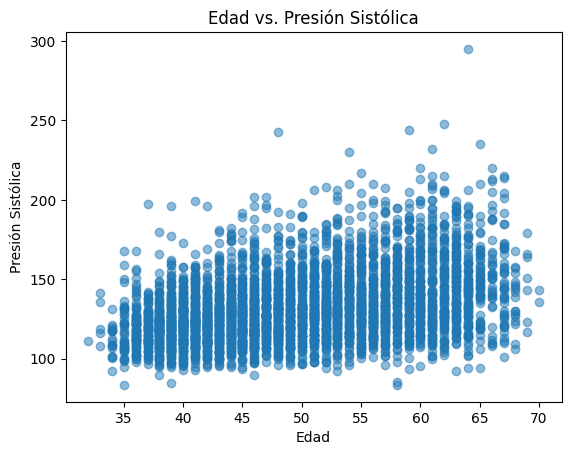

In [ ]:
plt.scatter(data['age'], data['sysBP'], alpha=0.5)
plt.xlabel('Edad')
plt.ylabel('Presión Sistólica')
plt.title('Edad vs. Presión Sistólica')
plt.show()


### Gráfico de barras para características categóricas

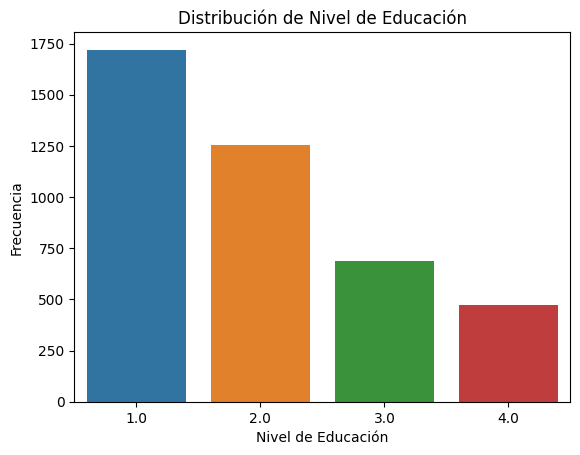

In [ ]:

sns.countplot(x='education', data=data)
plt.xlabel('Nivel de Educación')
plt.ylabel('Frecuencia')
plt.title('Distribución de Nivel de Educación')
plt.show()


####Imputación y Normalización de datos
#### 3. Si lo estimas necesario, ejecuta métodos de imputación y normalización de datos explicando explicando brevemente tus decisiones.

Elegí la imputación de los valores de 'education' y 'glucose', ya que son los que tienen mayor taza de valores nulos.
Y la decision fue tomada por las siguientes caracteristicas:

- Manejo de valores faltantes: En muchos conjuntos de datos reales, es común encontrar valores faltantes en algunas de las características. La regresión logística requiere que todas las características tengan valores válidos para funcionar correctamente. Los métodos de imputación, como reemplazar los valores faltantes con la media o la mediana de la columna, permiten que el modelo utilice todos los datos disponibles y evita errores debido a datos faltantes.

- La normalización de características puede ayudar al algoritmo de optimización utilizado en la regresión logística a converger más rápidamente. Cuando las características tienen una amplia gama de valores, el proceso de optimización puede volverse lento y difícil. La normalización reduce esta variabilidad y acelera la convergencia.

In [ ]:
#Imputación de valores faltantes
from sklearn.impute import SimpleImputer

#Lista de columnas con valores faltantes y su porcentaje
columnas_con_nans = [
    'education',
    'cigsPerDay',
    'BPMeds',
    'totChol',
    'BMI',
    'heartRate',
    'glucose'
]

#Creamos un imputador para llenar los valores faltantes con la mediana
imputer = SimpleImputer(strategy='median')

#Aplicamos la imputación solo a las columnas especificadas
data[columnas_con_nans] = imputer.fit_transform(data[columnas_con_nans])

In [ ]:
#Reevisamos nuevamente si tenemos algun valor nulo
data.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [ ]:
# Convertimos el resultado de la imputación en un DataFrame
#data_imputed = pd.DataFrame(data, columns=data.columns)

In [ ]:
# Aplicamos SMOTE para balancear las clases
from imblearn.over_sampling import SMOTE
X = data.drop('TenYearCHD', axis=1)
y = data['TenYearCHD']

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [ ]:
y_resampled.value_counts().sum()


7188

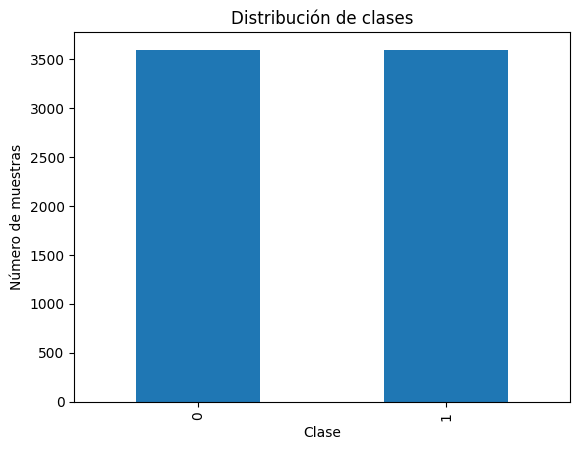

In [ ]:
# Verificacion de desbalanceo
y.value_counts().plot(kind='bar')
plt.xlabel('Clase')
plt.ylabel('Número de muestras')
plt.title('Distribución de clases')
plt.show()

In [ ]:
# Dividir los datos en conjuntos de entrenamiento y validación
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Verificar las formas de los conjuntos de datos resultantes
print("Forma de X_train:", X_train.shape)
print("Forma de X_val:", X_val.shape)
print("Forma de y_train:", y_train.shape)
print("Forma de y_val:", y_val.shape)

Forma de X_train: (5750, 15)
Forma de X_val: (1438, 15)
Forma de y_train: (5750,)
Forma de y_val: (1438,)


####Selección de carácteristicas
#### 4. Realiza un análisis básico de selección de características siguiendo alguna de las técnicas vistas a lo largo del módulo que te permita obtener una submuestra depurada del dataset original.

Una técnica comúnmente utilizada para la selección de características es el algoritmos más conocidos "Random Forest".

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Definimos las características (X) y la variable objetivo (y)
X = X_resampled  #  SMOTE
y = y_resampled  #  SMOTE

# Inicializamos el modelo de Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Entrenamos el modelo en el conjunto de entrenamiento
rf_model.fit(X, y)

# Obtenemos la importancia de las características
feature_importances = rf_model.feature_importances_

# Creamos una lista de tuplas que contienen la importancia y el nombre de la característica
features = list(zip(feature_importances, X.columns))

# Ordenamos la lista de características por importancia en orden descendente
features.sort(reverse=True)

# Seleccionamos las primeras 'n' características más importantes
n = 16
selected_features = [feature[1] for feature in features[:n]]

# Creamos una submuestra del conjunto de datos original con las características seleccionadas
subsample_data = data_imputed[selected_features]

# Agregamos la columna 'TenYearCHD' a la submuestra final
subsample_data['TenYearCHD'] = y_resampled

In [ ]:
subsample_data

,education,age,sysBP,totChol,glucose,diaBP,heartRate,BMI,cigsPerDay,currentSmoker,BPMeds,male,prevalentHyp,diabetes,prevalentStroke,TenYearCHD
0,4.0,39,106.0,195.0,77.0,70.0,80.0,26.97,0.0,0,0.0,1,0,0,0,0
1,2.0,46,121.0,250.0,76.0,81.0,95.0,28.73,0.0,0,0.0,0,0,0,0,0
2,1.0,48,127.5,245.0,70.0,80.0,75.0,25.34,20.0,1,0.0,1,0,0,0,0
3,3.0,61,150.0,225.0,103.0,95.0,65.0,28.58,30.0,1,0.0,0,1,0,0,1
4,3.0,46,130.0,285.0,85.0,84.0,85.0,23.10,23.0,1,0.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1.0,50,179.0,313.0,86.0,92.0,66.0,25.97,1.0,1,0.0,1,1,0,0,1
4234,3.0,51,126.5,207.0,68.0,80.0,65.0,19.71,43.0,1,0.0,1,0,0,0,0
4235,2.0,48,131.0,248.0,86.0,72.0,84.0,22.00,20.0,1,0.0,0,0,0,0,0
4236,1.0,44,126.5,210.0,78.0,87.0,86.0,19.16,15.0,1,0.0,0,0,0,0,0


#### 5. Partiendo de esta submuestra final, genera los grupos de entrenamiento y validación e imprime pos pantalla alguna características del mismo.

In [ ]:
# Paso 5 División en grupos de entrenamiento y validación
# Dividimos el conjunto de datos en características (X) y variable objetivo (y)
from sklearn.model_selection import train_test_split

# Definimos las carateristícas (X) y la variable objetivo (y) a partir de la submuestra final
X_final = subsample_data.drop('TenYearCHD', axis=1)
y_final = subsample_data['TenYearCHD']

# Dividimos los datos en conjuntos de entrenamiento y validación
# Usando una division del 80% de entrenamiento y 20% de validacion
X_train_final, X_val_final, y_train_final, y_val_final = train_test_split(X_final, y_final, test_size=0.2, random_state=42)

# Mostramos características del conjunto de entrenamiento
print("Forma de X_train_final:", X_train_final.shape)
print("Forma de y_train_final:", y_train_final.shape)

Forma de X_train_final: (3390, 15)
Forma de y_train_final: (3390,)


#### 6. Instancia el modelo Scikit-learn de tu elección y aplícalo sobre los datos seleccionados para el entrenamiento.

In [ ]:

# Inicializamos y entrenamos el modelo de Random Forest
from sklearn.ensemble import RandomForestClassifier

# Instancia del modelo Random Forest
modelo = RandomForestClassifier(random_state=42)

# Aplica el modelo sobre los datos de entrenamiento
modelo.fit(X_train_final, y_train_final)


RandomForestClassifier(random_state=42)

#### 7. Calcula y muestra por pantalla información (métricas) sobre el desempeño del modelo frente al conjunto de validación.

Accuracy:
 0.8537735849056604
Informe de Clasificación:
               precision    recall  f1-score   support

           0       0.86      0.99      0.92       724
           1       0.50      0.08      0.14       124

    accuracy                           0.85       848
   macro avg       0.68      0.53      0.53       848
weighted avg       0.81      0.85      0.81       848

Matriz de Confusión:
 [[714  10]
 [114  10]]


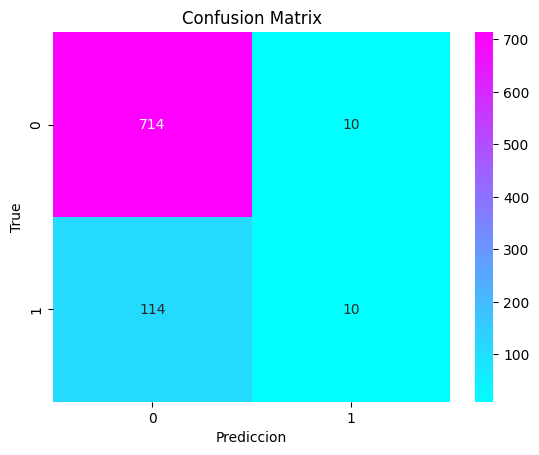

In [ ]:
# Paso 7: Evaluación del modelo
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Hacer predicciones en el conjunto de prueba
y_pred_val = modelo.predict(X_val_final)
# Mostramos el reporte de clasificación
y_pred_val = modelo.predict(X_val_final)


# Calculamos la precisión del modelo
accuracy = accuracy_score(y_val_final, y_pred_val)
# Calculamos métricas de desempeño
reporte_clasificacion = classification_report(y_val_final, y_pred_val)
# Calculamos la matriz de confusión
confusion = confusion_matrix(y_val_final, y_pred_val)



# Mostramos resultados
print(f"Accuracy:\n", accuracy)
print("Informe de Clasificación:\n", reporte_clasificacion)
print("Matriz de Confusión:\n", confusion)


# Creamos el heatmap
sns.heatmap(confusion, annot=True, cmap='cool', fmt='d')

# Añadir etiquetas y título
plt.xlabel('Prediccion')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Mostrar el heatmap
plt.show()


# Conclusión
1. Accuracy (Exactitud): El modelo tiene una exactitud de aproximadamente 85.38%. Esto significa que el 85.38% de las predicciones hechas en el conjunto de validación son correctas.

2. Informe de Clasificación:

- Precision (Precisión): La precisión para la clase 0 es alta (86%), lo que indica que de todas las predicciones positivas para esta clase, el 86% son correctas. Sin embargo, para la clase 1, la precisión es bastante baja (50%), lo que indica que solo el 50% de las predicciones positivas para esta clase son correctas.

- Recall (Exhaustividad): El recall para la clase 0 es muy alto (99%), lo que indica que el 99% de todas las muestras positivas para esta clase fueron identificadas correctamente. Para la clase 1, el recall es bajo (8%), lo que indica que solo el 8% de las muestras positivas para esta clase fueron identificadas correctamente.

- F1-score: Combina la precisión y el recall en una sola métrica. Es una media armónica de estos dos valores. Es útil cuando hay un desequilibrio entre las clases, como en este caso.

- Support: Indica cuántas muestras pertenecen a cada clase.

3. Matriz de Confusión:

- En la primera fila, tenemos los resultados para la clase 0. Se clasificaron correctamente 714 muestras como clase 0, y 10 muestras de clase 0 se clasificaron incorrectamente como clase 1.

- En la segunda fila, tenemos los resultados para la clase 1. Se clasificaron correctamente 10 muestras como clase 1, pero 114 muestras de clase 1 se clasificaron incorrectamente como clase 0.

4. Observaciones:

- El modelo tiene un buen desempeño al clasificar la clase 0, pero tiene dificultades con la clase 1. Esto puede indicar que hay un desbalance de clases y que el modelo necesita más datos de entrenamiento de la clase 1 o técnicas de manejo de desbalance.


####8.Una vez completado, comporte tu cuaderno de Google Colab con cualquier persona que tenga el enlace (apúntalo en la hoja de ejercicios)

 File "<ipython-input-1-4eebfc274d1e>", line 1
    https://colab.research.google.com/drive/1vSr3XFvpLMXctwJV0CIzmYFAZKEhtW39?usp=sharing